In [92]:
import os
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from collections import Counter

In [93]:
path = '../data/other/corporas/{}/data/{}/judgments.csv'
# corporas = ['discowug', 'dwug_en', 'dwug_de']
corporas = ['dwug_en', 'dwug_de']

data_dict = {}

In [94]:
for corp in corporas:
    for _dir in os.listdir('../data/other/corporas/{}/data/'.format(corp)):
        with open(path.format(corp, _dir), 'r') as file:
            reader = csv.reader(file, delimiter='\t')
            for row in reader:
                # id1, id2, annotator, judgement
                if row[0] != 'identifier1': 
                    id1, id2 = sorted(row[:2])
                    if data_dict.get((id1, id2), None) is None:
                        data_dict[(id1, id2)] = []
                    data_dict[(id1, id2)].append(row[2:4])
        file.close()
# data_dict

1.752049500748319


[22449, 13659, 6649, 1487, 393, 103, 27]

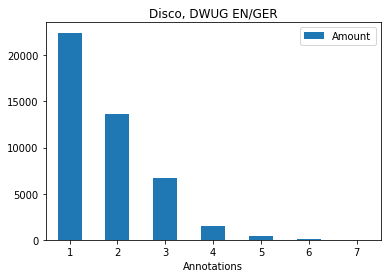

In [95]:
data_len = []
for k, v in data_dict.items():
    data_len.append(len(v))    
print(np.mean(data_len))

counter = dict(sorted(Counter(data_len).items(), key=lambda pair: pair[0]))

x: list = []
y: list = []
for k, v in counter.items():
    x.append(k)
    y.append(v)

x, y

df = pd.DataFrame({'Annotations': x, 'Amount': y})
ax = df.plot.bar(x='Annotations', y='Amount', title='Disco, DWUG EN/GER', rot=0)

y

In [96]:
def multiple_annotations(data_dict: dict, min_annotations: int):
    multiple_annotations_var_eq = []
    multiple_annotations_var_geq = []

    for k, v in data_dict.items():
        if len(v) == min_annotations:
            tmp = []
            for ann in v:
                tmp.append(int(float(ann[1])))
            multiple_annotations_var_eq.append(np.var(tmp))

        if len(v) >= min_annotations:
            tmp = []
            for ann in v:
                tmp.append(int(float(ann[1])))
            multiple_annotations_var_geq.append(np.var(tmp))
    return multiple_annotations_var_eq, multiple_annotations_var_geq

var_eq, var_geq = multiple_annotations(data_dict, 2)

print('First few var:\n', var_geq[:10])
print('Mean of the variances: ', np.mean(var_geq))

First few var:
 [0.15999999999999998, 0.25, 0.8, 0.0, 0.25, 0.6666666666666666, 0.25, 0.8888888888888888, 0.25, 0.8888888888888888]
Mean of the variances:  0.3092051121909468


In [97]:
x = list(range(2, 8))
y = [np.mean(multiple_annotations(data_dict, i)[0]) for i in range(2, 8)]

print('Annotations', x, '\nVariance', y)


Annotations [2, 3, 4, 5, 6, 7] 
Variance [0.20389486785269786, 0.43669056332614764, 0.5616173503698723, 0.7136895674300255, 0.7179072276159655, 0.8420256991685563]


([<matplotlib.axis.XTick at 0x7f12181f8280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

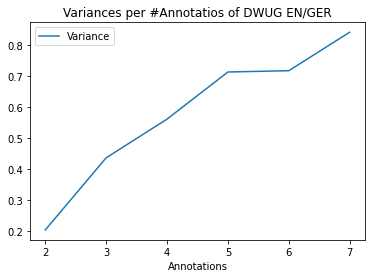

In [99]:
df = pd.DataFrame({'Annotations': x, 'Variance': y})
ax = df.plot.line(x='Annotations', y='Variance', title='Variances per #Annotatios of DWUG EN/GER')
plt.xticks(list(range(2, 8)))